<div align="center">



# Deep Generative Models
## Computer Engineering Department
### Homework 2: Variational Autoencoders
#### Alireza Sabounchi
sabounchial@gmail.com

</div>


### Full Name : Amir Mohammad Babaei
### Student Number : 402212399


# Introduction
**The Model**

*Variational Autoencoders* (VAEs) are a type of generative model that use deep learning methods to both model and generate data. They are part of the autoencoder family, but with a twist: they add a probabilistic layer that models the input data as a distribution, rather than a single point. They have two main components: an encoder and a decoder. The encoder takes the input data and compresses it into a latent space representation. This representation is usually a distribution of the possible states of the input data. The decoder then takes this distribution and generates data that is similar to the original input data.

The goal of a VAE is to approximate the true data distribution of the training set so as to generate new data points with some variations. The data likelihood can be decomposed as:

$$p_{\theta}(x) = \int_{z} p_{\theta}(x|z)p_{\theta}(z)dz$$
In the vanilla variational autoencoder, z is usually taken to be a finite-dimensional vector of real numbers.

The KL divergence between the approximate posterior $q_{\phi}(z|x)$ and the prior $p(z)$ is given by:

$$KL(q_{\phi}(z|x)||p(z)) = -\frac{1}{2}\sum_{j=1}^{J}(1 + log((\sigma_{j})^2) - (\mu_{j})^2 - (\sigma_{j})^2)$$

and the VAE is trained by maximizing the evidence lower bound (ELBO) on the marginal likelihood:

$$\mathcal{L}(\theta, \phi; x^{(i)}) = \mathbb{E}_{z \sim q_{\phi}(z|x^{(i)})}[\log p_{\theta}(x^{(i)}|z)] - KL(q_{\phi}(z|x^{(i)})||p(z))$$


Possible applications of VAEs include image generation, anomaly detection, and even drug discovery. They are particularly useful when you want to generate new data that is similar to, but not exactly the same as, your input data.

<div align="center">

![httpsen.wikipedia.orgwikiVariational_autoencoder.png](attachment:httpsen.wikipedia.orgwikiVariational_autoencoder.png)
### Figure 1: VAE Schema (Source: Wikipedia)

</div>

**The Database**

The *MNIST* (Modified National Institute of Standards and Technology) database is a large database of handwritten digits that is commonly used for training various image processing systems. The database contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image of a handwritten digit between 0 and 9.This database is widely used in the field of machine learning, and it has become a benchmark for evaluating the performance of various machine learning algorithms, especially in the field of image recognition. In the context of VAEs, the MNIST database can be used to demonstrate how VAEs can generate new  images of handwritten digits that are not part of the original dataset.

**Additional references:**
1. https://raise.mit.edu/vae/

2. https://lilianweng.github.io/posts/2018-08-12-vae/

3. https://arxiv.org/pdf/1906.02691.pdf

**Before we start, here are some things to consider:**
1. It is highly recommended that you run this notebook using google colab.
2. It is highly encouraged to be creative and explore different options in each section in order to gain intuition on the subject matter. However, the final submition should contain only the requested methods, if specified.
3. DO NOT change any part of the code that is not marked as **Exercise** or **Question** unless specified otherwise.

## An overview of the training process of a Variational Autoencoder (VAE)
The training process of a VAE involves the following steps:

1. Data Preparation: Prepare your dataset and divide it into training and validation sets. In the case of the MNIST dataset, the data is already split into a training set and a test set.

2. Model Initialization: This step involves setting up the encoder and decoder networks and specifying their architecture.

3. Loss Function: The loss function for a VAE is the sum of the reconstruction loss (usually binary cross-entropy) and the KL divergence.

4. Optimizer: This is the algorithm that adjusts the parameters of your model to minimize the loss function. Common choices include SGD (Stochastic Gradient Descent), Adam, and RMSprop.

5. Training Loop: For each epoch (an epoch is one pass through the entire training set):

    5.1. Forward Pass: Pass your input data through the model. The model will return the reconstructed data, the mean and log variance of the latent space.

    5.2. Loss Calculation: Calculate the loss function using the original data, the reconstructed data, and the mean and log variance of the latent space.

    5.3. Backward Pass: Perform backpropagation to calculate the gradients.
    
    5.4. Parameter Update: Update the model parameters using the optimizer.

# Loading the data
First, we load the MNIST dataset, in addition to all necessary libraries. Feel free to add additional libraries you might need.

In [6]:
# Import necessary libraries. You may import any additional libraries here
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from collections import Counter

seed_value = 42
random.seed(seed_value)
torch.manual_seed(seed_value)


In [7]:
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
#test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Data Visualization

Data visualization is a critical step in understanding the patterns, trends, and insights hidden in the raw data. It involves the creation and study of the visual representation of data, meaning “information that has been abstracted in some schematic form, including attributes or variables for the units of information”. Now, let’s visualize some data from the MNIST dataset.

*You may use "cv2" library for reading images but any other method is acceptable.*

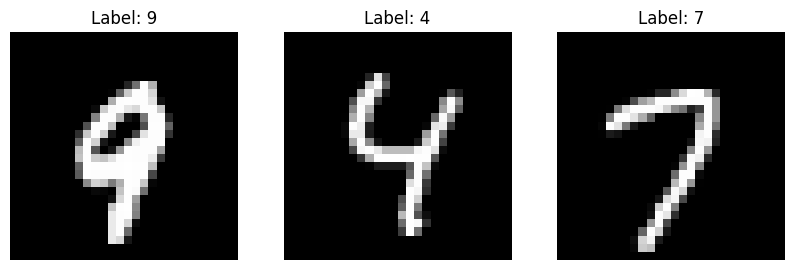

In [8]:
##### Exercise 1: Data Visualization #####
# show 3 random samples of the dataset
# Define a function to visualize images
def plot_samples(dataset, num_samples=3):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
    for i in range(num_samples):
        index = random.randint(0, len(dataset) - 1)
        image, label = dataset[index]
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Call the function to plot the samples
plot_samples(train_dataset)

# Statistical Analysis
Statistical analysis of datasets can provide valuable insights into the nature and complexity of the data. This can include understanding the distribution of the digits, visualizing the average image for each digit, analyzing the pixel intensity distribution, etc.

Here’s a brief explanation of these analyses:

**Digit Distribution:** This involves analyzing the frequency of each digit in the dataset. A balanced dataset would have approximately equal representation for each digit.

**Average Image Visualization:** This involves calculating and visualizing the average image for each digit. This can give us an idea of the common patterns shared among the same digits.

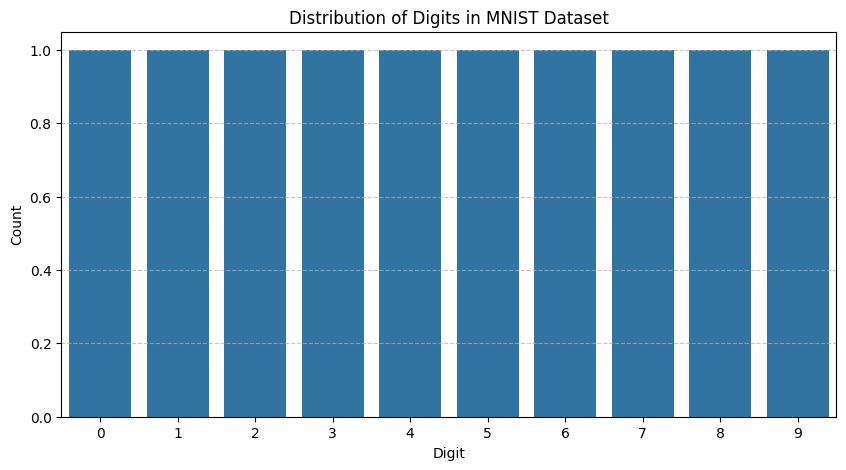

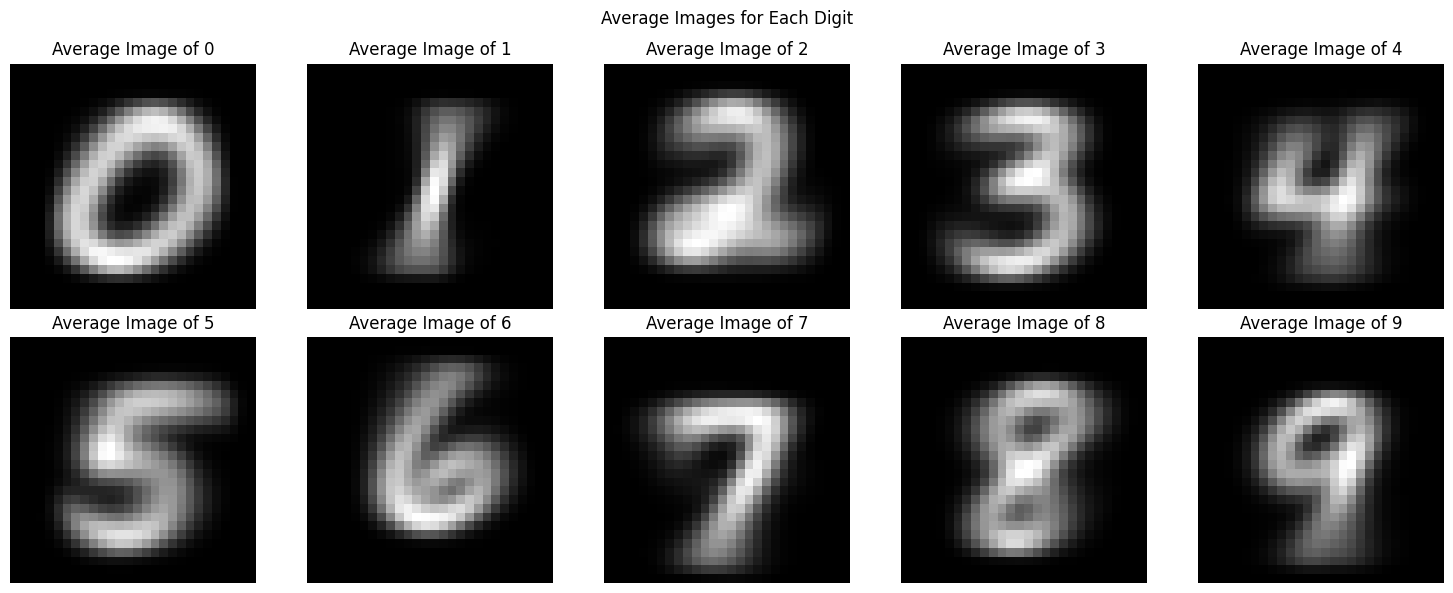

In [9]:
##### Exercise 2: Statistical Analysis of MNIST #####
# Digit Distribution
def plot_digit_distribution(data):
    labels = [label for _, label in data]
    labels_counter = Counter(labels)
    plt.figure(figsize=(10, 5))
    sns.countplot(labels_counter)
    plt.title('Distribution of Digits in MNIST Dataset')
    plt.xlabel('Digit')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Average Image Visualization
def plot_average_images(data):
    # Initialize a dictionary to hold sum of images for each digit
    digit_sums = {i: np.zeros((28, 28)) for i in range(10)}
    digit_counts = {i: 0 for i in range(10)}

    # Sum up images for each digit
    for img, label in data:
        digit_sums[label] += img.squeeze().cpu().numpy()
        digit_counts[label] += 1

    # Calculate average by dividing sum by count
    digit_averages = {digit: digit_sums[digit] / digit_counts[digit] for digit in digit_sums}

    # Plotting
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for digit in digit_averages:
        ax = axes[digit // 5][digit % 5]
        ax.imshow(digit_averages[digit], cmap='gray')
        ax.set_title(f'Average Image of {digit}')
        ax.axis('off')
    plt.suptitle('Average Images for Each Digit')

    plt.tight_layout()
    plt.show()

plot_digit_distribution(train_dataset)
plot_average_images(train_dataset)

# Architecture

The structure of a VAE includes two main parts: the encoder and the decoder

*The encoder* takes the input data and compresses it into a latent-space representation. It does this by turning the input data into two parameters in a latent space of representations.

*The decoder* then takes these latent space representations and decodes them back to the original input data.

Your task is to complete the VAE Class below to represent a complete variational autoencoder. You are free to experiment with different Hyper-parameters.

In [11]:
# This class defines the VAE architecture
class VAE(nn.Module):

    ##### Exercise 3: Initialize the VAE #####
    def __init__(self, latent_dim = 96): # Change latent space size as needed
        super(VAE, self).__init__()

        # Assign the mean and log variance of the latent space
        self.mean = nn.Linear(96, latent_dim)
        self.logvar = nn.Linear(96, latent_dim)

        # Define the Encoder layers: these layers will map the input data to the mean and log variance of the latent space
        # You need to add your own layers here
        self.encoder = nn.Sequential(
            # (1, 28, 28)
            nn.Conv2d(1, 2, 3, 1, 1),
            nn.ReLU(inplace=True),

            # (2, 28, 28)
            nn.Conv2d(2, 4, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # (4, 14, 14)
            nn.Conv2d(4, 4, 3, 1, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),

            # (4, 7, 7)
            nn.Flatten(),

            # (4 * 7 * 7)
            nn.Linear(4 * 7 * 7, 96),

            # (96)
        )

        # Define the Decoder layers: these layers will map the latent space to the reconstructed output data
        # You need to add your own layers here
        self.decoder = nn.Sequential(
            # (96)
            nn.Unflatten(1, (96, 1, 1)),

            # (96, 1, 1)
            nn.ConvTranspose2d(96, 200, 7),
            nn.BatchNorm2d(200),
            nn.ReLU(inplace=True),

            # (200, 7, 7)
            nn.ConvTranspose2d(200, 120, 5, 1),
            nn.BatchNorm2d(120),
            nn.ReLU(inplace=True),

            # (120, 11, 11)
            nn.ConvTranspose2d(120, 60, 5, 1),
            nn.BatchNorm2d(60),
            nn.ReLU(inplace=True),

            # (60, 15, 15)
            nn.ConvTranspose2d(60, 1, 4, 2, 2),
            nn.Sigmoid(),

            # (3, 28, 28)
        )

    ##### Exercise 4: Encoder #####
    def encode(self, x):
        '''
        This function encodes the input to the latent space using linear transformation layers and a ReLU activation function.
        '''
        # Your code here
        x_enc = self.encoder(x)
        mean = self.mean(x_enc)
        logvar = self.logvar(x_enc)

        return mean, logvar # Return the mean and log variance of the latent space


    ##### Exercise 5: reparameterizer #####
    def reparameterize(self, mu, logvar):
        '''
        This function does the following:
        1. Compute the standard deviation from the log variance
        2. Sample a random tensor from the standard normal distribution with the same shape as std
        3. Return a sample from the latent space using the reparameterization trick
        '''
        # Your code here
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)     # eps ~ Normal
        z = mu + std * eps

        return z # Return a sample from the latent space using the reparameterization trick


    ##### Exercise 6: Decoder #####
    def decode(self, z):
        '''
        This function decodes the latent space to the output space through:
        1. Apply a linear transformation and a ReLU activation to the latent space
        2. Apply a linear transformation and a sigmoid activation to the hidden layer
        '''
        # Your code here
        x = self.decoder(z)

        return x  # Return result

    ##### Exercise 7: Forward Propagation #####
    def forward(self, x):
        '''
        This function defines the forward propagation of your model:
        1. Encode the input data and get the mean and log variance of the latent space
        2. Reparameterize the mean and log variance and get a sample from the latent space
        3. Return the decoded samples, mu and logvar
        '''
        # Your code here
        mean, logvar = self.encode(x)
        z = self.reparameterize(mean, logvar)
        recon_x = self.decode(z)

        return recon_x, mean, logvar # Return results


In [12]:
# !pip install torch-summary
from torchsummary import summary

In [13]:
summary(VAE(), (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 96]                  --
|    └─Conv2d: 2-1                       [-1, 2, 28, 28]           20
|    └─ReLU: 2-2                         [-1, 2, 28, 28]           --
|    └─Conv2d: 2-3                       [-1, 4, 28, 28]           76
|    └─ReLU: 2-4                         [-1, 4, 28, 28]           --
|    └─MaxPool2d: 2-5                    [-1, 4, 14, 14]           --
|    └─Conv2d: 2-6                       [-1, 4, 14, 14]           148
|    └─ReLU: 2-7                         [-1, 4, 14, 14]           --
|    └─MaxPool2d: 2-8                    [-1, 4, 7, 7]             --
|    └─Flatten: 2-9                      [-1, 196]                 --
|    └─Linear: 2-10                      [-1, 96]                  18,912
├─Linear: 1-2                            [-1, 96]                  9,312
├─Linear: 1-3                            [-1, 96]                  9,312
├─Se

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 96]                  --
|    └─Conv2d: 2-1                       [-1, 2, 28, 28]           20
|    └─ReLU: 2-2                         [-1, 2, 28, 28]           --
|    └─Conv2d: 2-3                       [-1, 4, 28, 28]           76
|    └─ReLU: 2-4                         [-1, 4, 28, 28]           --
|    └─MaxPool2d: 2-5                    [-1, 4, 14, 14]           --
|    └─Conv2d: 2-6                       [-1, 4, 14, 14]           148
|    └─ReLU: 2-7                         [-1, 4, 14, 14]           --
|    └─MaxPool2d: 2-8                    [-1, 4, 7, 7]             --
|    └─Flatten: 2-9                      [-1, 196]                 --
|    └─Linear: 2-10                      [-1, 96]                  18,912
├─Linear: 1-2                            [-1, 96]                  9,312
├─Linear: 1-3                            [-1, 96]                  9,312
├─Se

# Define the Loss Function
The loss function of a Variational Autoencoder (VAE) is composed of two parts: the reconstruction loss and the KL divergence.

*Reconstruction Loss* part of the loss function measures how well the VAE is able to reconstruct the input data after it has been encoded and decoded. In other words, it measures the difference between the original input data and the reconstructed data. A common choice for the reconstruction loss is the Binary Cross-Entropy (BCE) loss.

*KL Divergence* is a measure of how one probability distribution diverges from a second, expected probability distribution. In VAEs, it’s used to measure the divergence between the learned latent distribution and a prior distribution (usually a standard normal distribution). The KL divergence regularizes the VAE to ensure that the latent space has good properties that enable generative processes.
The total loss is the sum of the reconstruction loss and the KL divergence.

In [14]:
def loss_function(recon_x, x, mu, logvar):
    ##### Exercise 8: Loss Function #####
    '''
    Compute the binary cross entropy between the reconstructed data and the original data
    Compute the KL divergence between the Gaussian distribution of the latent space and a standard normal distribution
    '''

    # Your code
    bce_loss = F.binary_cross_entropy(recon_x, x, reduction='sum')

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return bce_loss + kld_loss # Return the sum of BCE & KL-Divergence

# Training loop
Now, it’s time to begin the training process. Make sure to understand the implementation.

In [15]:
def train(model, optimizer, train_loader, device, epochs):
    # Keep a record of training losses
    train_losses = []

    # Set the model to training mode
    model.train()

    # Initialize the total loss for this epoch
    train_loss = 0

    # Loop over each batch from the training set
    for batch_idx, (data, _) in enumerate(train_loader):
        # Move the input data to the device (CPU or GPU) for faster computations
        data = data.to(device)

        # Zero the gradients. This is a necessary step because PyTorch accumulates gradients
        optimizer.zero_grad()

        # Forward pass: compute the output of the model by passing the data through it
        recon_batch, mu, logvar = model(data)

        # Compute the loss
        loss = loss_function(recon_batch, data, mu, logvar)

        # Backward pass: compute the gradients of the loss w.r.t. the model's parameters
        loss.backward()

        # Update the total loss
        train_loss += loss.item()

        # Perform a single optimization step: update the model's parameters
        optimizer.step()

    # Calculate the average loss over the epoch
    average_loss = train_loss / len(train_loader.dataset)

    # Print the epoch number and the average loss with better formatting
    print('Epoch: [{}/{}], Average loss: {:.4f}'.format(epoch, epochs, train_loss / len(train_loader.dataset)))
    train_losses.append(loss.item())


At this stage of the process, it's time to establish the training parameters for your model. The selection of these parameters can significantly influence the performance and outcomes of your model.

Parameters such as the learning rate, batch size, number of epochs, and optimizer type, among others, all play crucial roles in determining how effectively your model can learn from the data.

Feel free to experiment with different values for these parameters. Observing how alterations in these values impact the model's results can provide valuable insights into the learning process and help you fine-tune your model for optimal performance. Remember, machine learning is as much an art as it is a science! Happy experimenting!

In [16]:
##### Exercise 9: Training Parameters #####
# Create an instance of the VAE model
model = VAE()

# Choose the device (CPU or GPU) based on availability
# This allows the model to use GPU acceleration if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
# This step is necessary to use GPU acceleration
model = model.to(device)

# Set the batch size for training
batch_size = 512

# Set the learning rate
learning_rate = 1e-3

# Create an instance of the Adam optimizer with a learning rate(try different learning rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#Set the number of epochs to train the model
epochs = 50

# Create the data loader for the training data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

# Training loop
for epoch in range(1, epochs+1):
    train(model, optimizer, train_loader, device, epochs)

Epoch: [1/50], Average loss: 232.4724
Epoch: [2/50], Average loss: 158.0832
Epoch: [3/50], Average loss: 133.9592
Epoch: [4/50], Average loss: 123.0457
Epoch: [5/50], Average loss: 117.7036
Epoch: [6/50], Average loss: 114.2597
Epoch: [7/50], Average loss: 111.9143
Epoch: [8/50], Average loss: 110.3867
Epoch: [9/50], Average loss: 109.1757
Epoch: [10/50], Average loss: 108.3285
Epoch: [11/50], Average loss: 107.4744
Epoch: [12/50], Average loss: 106.7912
Epoch: [13/50], Average loss: 106.2421
Epoch: [14/50], Average loss: 105.8232
Epoch: [15/50], Average loss: 105.3974
Epoch: [16/50], Average loss: 104.9435
Epoch: [17/50], Average loss: 104.6038
Epoch: [18/50], Average loss: 104.3575
Epoch: [19/50], Average loss: 103.9714
Epoch: [20/50], Average loss: 103.6460
Epoch: [21/50], Average loss: 103.3445
Epoch: [22/50], Average loss: 103.2058
Epoch: [23/50], Average loss: 102.9710
Epoch: [24/50], Average loss: 102.7978
Epoch: [25/50], Average loss: 102.6127
Epoch: [26/50], Average loss: 102.

# Generative Model

Congratulations on successfully training your model! You've reached an exciting stage in the process. With a trained Variational Autoencoder (VAE), you now have a generative model that can create new, unseen data.

The power of a VAE lies in its ability to generate new data by sampling from the latent space. The latent space is a lower-dimensional space learned by the encoder where similar data points are closer together. By picking a point in this space, we can generate a new data point that is similar to the data points around it in the latent space.

Here's how you can generate new images:

1. **Sampling from the latent space**: Randomly select a point in the latent space. This point represents a compressed representation of some input.

2. **Decoding the sample**: Pass the sampled point through the decoder part of the VAE. The decoder will then generate a new data point that corresponds to the sampled point in the latent space.

The code snippet provided in the next section will guide you through this process. As you go through the code, make sure to understand each step. This understanding is crucial for mastering the workings of VAEs and generative models in general.

Let's proceed and see the generative power of your trained VAE in action!

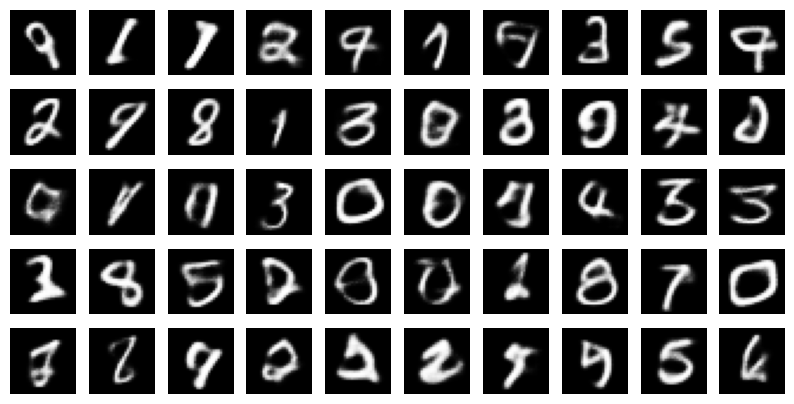

In [17]:
with torch.no_grad():
    # Generate a batch of vectors in the latent space
    # These vectors are sampled from a normal distribution
    z = torch.randn(50, 96).to(device)  # Adjust the batch size as needed

    # Decode the latent vectors into images
    sample = model.decode(z).cpu()

# Plot the generated images
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(10,5))
for i in range(5):
    for j in range(10):
        # Reshape the tensor to a 28x28 image and display it
        ax[i][j].imshow(sample[i*10+j].reshape(28, 28), cmap='gray')

        # Remove the axes for a better visual result
        ax[i][j].axis('off')

# Display the plot
plt.show()

# Comparison
Comparing your generative model's results with the original MNIST dataset can provide valuable insights into the performance of the model.
Use your trained VAE model to generate a large number of images. You can do this by sampling from the latent space and passing the samples through the decoder.

Then extract the statistical properties of the generated images and compare them to the original MNIST dataset. How do they compare? Can they be compared on all 3 criteria? why / why not? Are they from the same distribution? Explain your reasoning.

**Your answer:**


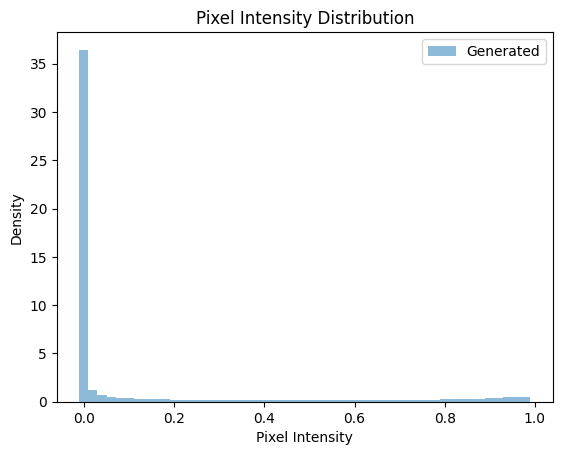

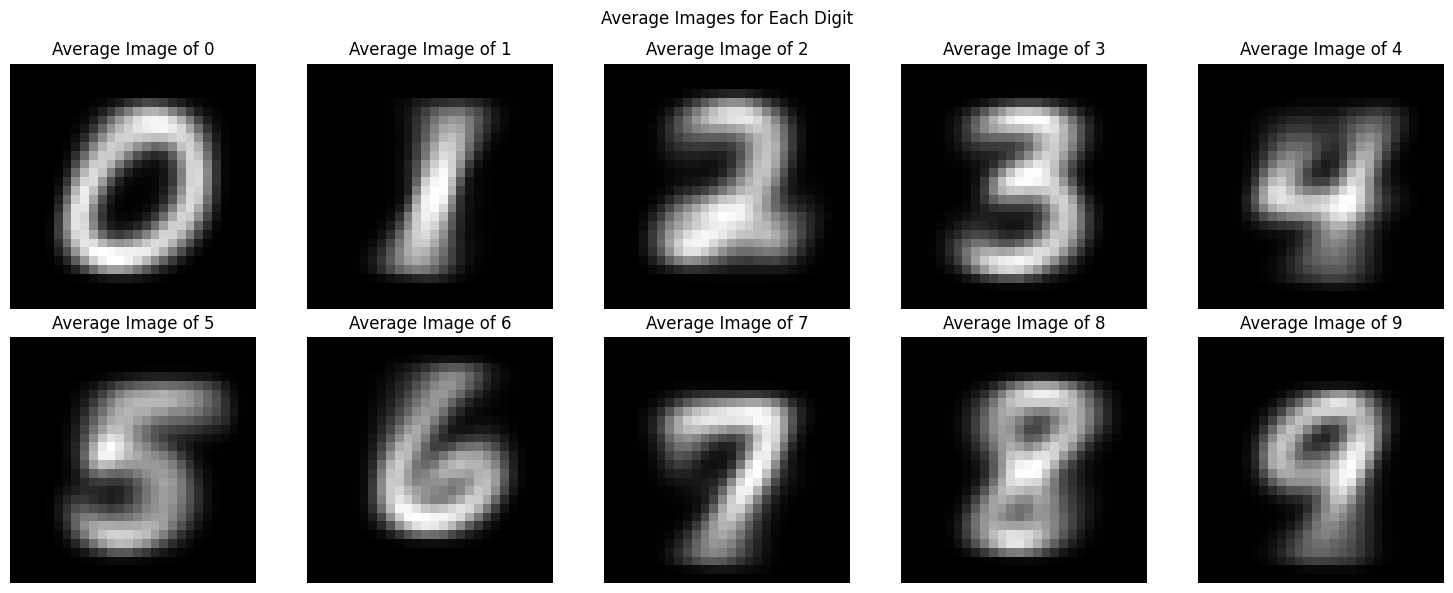

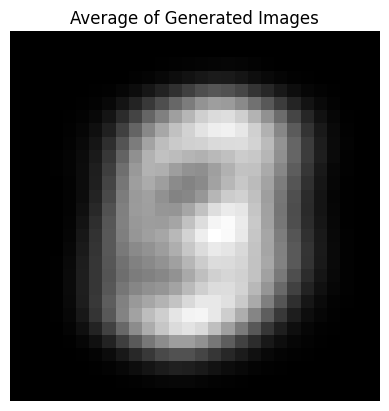

In [37]:
##### Exercise 10: Statistical Analysis of Generative model #####

# Generate a large number of images
num_samples = 10000
latent_dim = 96

with torch.no_grad():
    z = torch.randn(num_samples, latent_dim).to(device)
    generated_images = model.decode(z).squeeze().cpu().numpy()

# Digit Distribution
def pixel_intensity_distribution(data):
    intensities = []
    for img in data:
        intensities.extend(img.flatten())
    return np.histogram(intensities, bins=50, range=(0, 1), density=True)

# Pixel intensity distribution for generated images
generated_pixel_distribution = pixel_intensity_distribution(generated_images)

# Plot pixel intensity distribution comparison
plt.bar(generated_pixel_distribution[1][:-1], generated_pixel_distribution[0], width=0.02, alpha=0.5, label='Generated')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Pixel Intensity Distribution')
plt.legend()
plt.show()

# Average Image Visualization
def plot_average_images_vae(data):
    # Initialize a dictionary to hold sum of images for each digit
    digit_sums = {i: np.zeros((28, 28)) for i in range(10)}
    digit_counts = {i: 0 for i in range(10)}

    # Sum up images for each digit
    for img, label in data:
        digit_sums[label] += model(img.unsqueeze(0).to(device))[0].squeeze().detach().cpu().numpy()
        digit_counts[label] += 1

    # Calculate average by dividing sum by count
    digit_averages = {digit: digit_sums[digit] / digit_counts[digit] for digit in digit_sums}

    # Plotting
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for digit in digit_averages:
        ax = axes[digit // 5][digit % 5]
        ax.imshow(digit_averages[digit], cmap='gray')
        ax.set_title(f'Average Image of {digit}')
        ax.axis('off')
    plt.suptitle('Average Images for Each Digit')

    plt.tight_layout()
    plt.show()

plot_average_images_vae(train_dataset)

# Average Image Visualizat
plt.imshow(generated_images.mean(axis=0), cmap='gray')
plt.title("Average of Generated Images")
plt.axis(False)
plt.show()

# Bonus
Generate 3 images using your model and find the closest entries to them from the original dataset. How do they compare? Explain your reasoning.

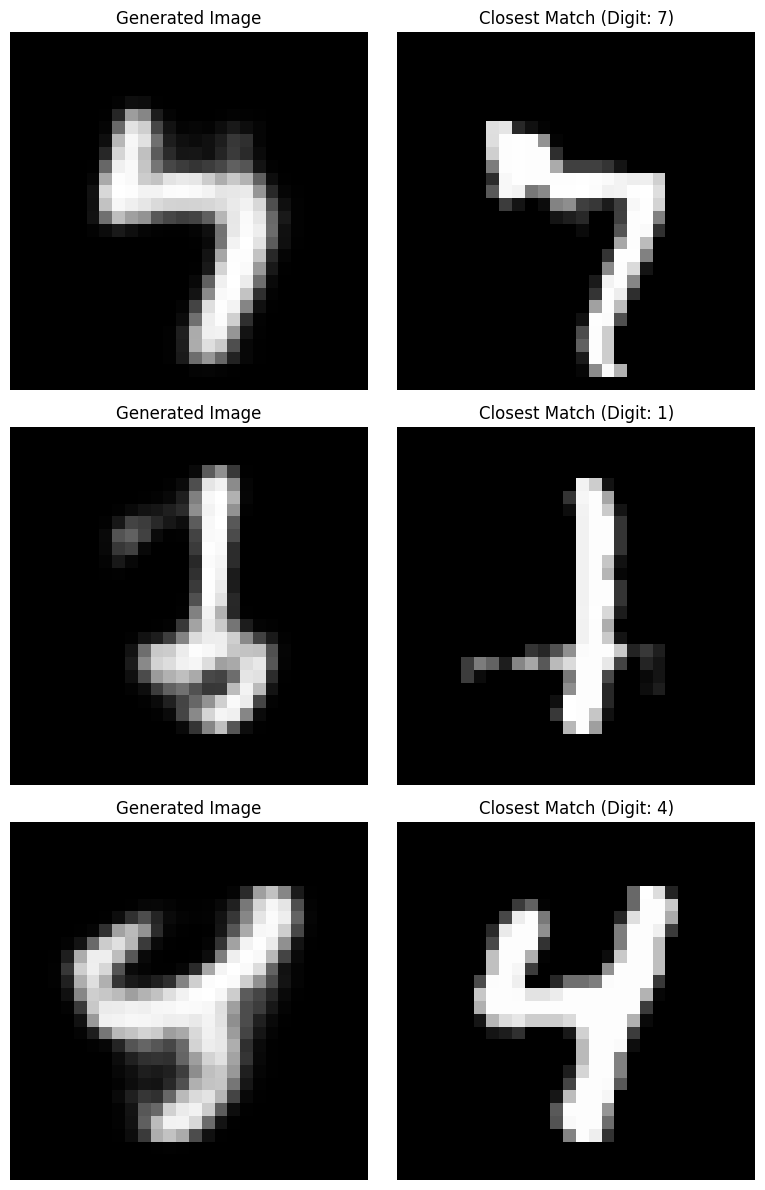

In [39]:
##### Exercise 11: BONUS#####
# Generate 3 images using the VAE model
num_samples = 3
latent_dim = 96

with torch.no_grad():
    z = torch.randn(num_samples, latent_dim).to(device)
    generated_images = model.decode(z).squeeze().detach().cpu().numpy()

from sklearn.metrics import mean_squared_error

def closest_mse_matches(generated_images, original_images):
    closest_matches = []
    for gen_img in generated_images:
        closest_match = min(original_images, key=lambda img: mean_squared_error(gen_img.flatten(), img[0].squeeze().cpu().numpy().flatten()))
        closest_matches.append(closest_match)
    return closest_matches

# Get closest matches for generated images
original_images = list(train_dataset)
closest_matches = closest_mse_matches(generated_images, original_images)

fig, axes = plt.subplots(3, 2, figsize=(8, 12))
for i, (gen_img, closest_match) in enumerate(zip(generated_images, closest_matches)):
    axes[i, 0].imshow(gen_img, cmap='gray')
    axes[i, 0].set_title("Generated Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(closest_match[0].squeeze().cpu().numpy(), cmap='gray')
    axes[i, 1].set_title(f"Closest Match (Digit: {closest_match[1]})")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


**Your answer:**

**If you have any questions or need further clarification on any part of the exercise, please don’t hesitate to ask.**